In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file=pd.read_csv("/content/finance_economics_dataset.csv")
file

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [3]:
# 1. What is the shape of the dataset?
w=file.shape
print("the shape of the dataset is",w)

the shape of the dataset is (3000, 24)


In [4]:
# 2. What are the column names and their data types?
file.columns
file.dtypes

,0
Date,object
Stock Index,object
Open Price,float64
Close Price,float64
Daily High,float64
Daily Low,float64
Trading Volume,int64
GDP Growth (%),float64
Inflation Rate (%),float64
Unemployment Rate (%),float64


In [5]:
# 3.  How many unique stock indices are there?
r=file["Stock Index"].unique()
print("there are",len(r),r,"unique stock indices")

there are 3 ['Dow Jones' 'S&P 500' 'NASDAQ'] unique stock indices


In [6]:
# 4. What is the date range of the dataset?
file["Date"]=pd.to_datetime(file["Date"])
starting_date=file["Date"].min()
ending_date=file["Date"].max()
print("date range =",starting_date,"to",ending_date)


date range = 2000-01-01 00:00:00 to 2008-03-18 00:00:00


In [7]:
# 5. Are there any missing values?
file.isnull().sum()

,0
Date,0
Stock Index,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),0
Inflation Rate (%),0
Unemployment Rate (%),0


In [8]:
# 6. Are there negative values in columns that should be non-negative?
negative_values=(file.select_dtypes(include="number")<0).any()
for col,has_negative in negative_values.items():
  if has_negative:
    print(col,"has negative values.")

GDP Growth (%) has negative values.


In [9]:
# 7. What is the summary of GDP Growth (%)?
file["GDP Growth (%)"].describe()

,GDP Growth (%)
count,3000.000000
mean,2.608903
std,4.287337
min,-5.000000
25%,-1.012500
50%,2.725000
75%,6.242500
max,10.000000


In [10]:
# 8. Are there rows with zero or near-zero trading volume?
t=(file["Trading Volume"]<=1).sum()
print("there are",t,"rows with zero or near-zero trading volume")

there are 0 rows with zero or near-zero trading volume


In [11]:
# 9. Are there any duplicate rows?
y=file.duplicated().sum()
print("there are",y,"duplicate rows")


there are 0 duplicate rows


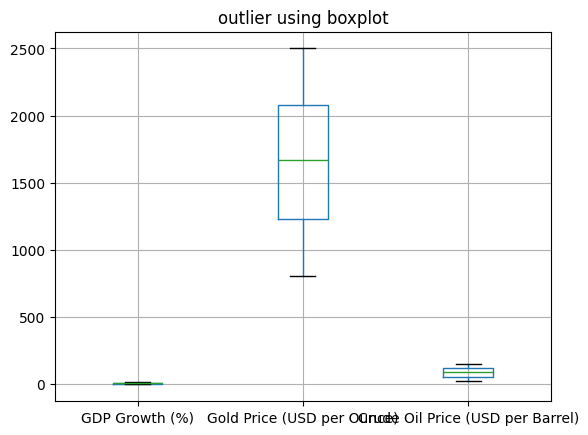

In [12]:
# 10. Are there outliers in GDP, Gold, or Oil prices?
file[["GDP Growth (%)","Gold Price (USD per Ounce)","Crude Oil Price (USD per Barrel)"]].boxplot()
plt.title("outlier using boxplot")
plt.show()

In [13]:
# 11.  What is the summary of Inflation Rate (%)?
file["Inflation Rate (%)"].describe()

,Inflation Rate (%)
count,3000.000000
mean,5.096830
std,2.910513
min,0.010000
25%,2.607500
50%,5.110000
75%,7.600000
max,10.000000


In [14]:
# 12. What is the average unemployment rate?
s=file["Unemployment Rate (%)"].mean()
print("the average unemployment rate is:",s)

the average unemployment rate is: 8.663786666666667


In [15]:
# 13. Which index has the highest trading volume?
file.groupby("Stock Index")["Trading Volume"].sum()

,Trading Volume
Stock Index,
Dow Jones,477653121048
NASDAQ,499464048465
S&P 500,533041986803


In [16]:
# 14. How many stock records are from each index?
file["Stock Index"].value_counts()

,count
Stock Index,
S&P 500,1036
NASDAQ,1007
Dow Jones,957


In [17]:
# 15. What is the correlation between inflation and interest rate?
o=file["Inflation Rate (%)"].corr(file["Interest Rate (%)"])
print("corelation between inflation and interest rate is:",o)

corelation between inflation and interest rate is: 0.00573292723557624


In [18]:
# 16. What is the average Consumer Confidence Index?
e=file["Consumer Confidence Index"].mean()
print("average consumer confidence index is:",e)

average consumer confidence index is: 85.036


In [19]:
# 17. Which column has the highest standard deviation?
v=file.select_dtypes(include="number").std()
d=v.idxmax()
print("highest standard deviation column is:",d)

highest standard deviation column is: Trading Volume


In [20]:
# 18. What is the highest gold price recorded?
f=file["Gold Price (USD per Ounce)"].max()
print("the highest gold price recorded is:",f)

the highest gold price recorded is: 2499.66


In [21]:
# 19. Which date had the highest crude oil price?
u=file.loc[file["Crude Oil Price (USD per Barrel)"].idxmax(),"Date"]
print("the date with highest crude oil price is:",u)

the date with highest crude oil price is: 2001-11-22 00:00:00


In [22]:
# 20. What is the average corporate profit?
g=file["Corporate Profits (Billion USD)"].mean()
print("the average corporate profit is:",g)

the average corporate profit is: 2553.7563333333333
